In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [7]:
df= pd.read_csv('winequality-white.csv', sep=';')

In [49]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


In [27]:
def find_minmax(df):
    df_dict={}
    for col in df.columns:
        col_min= min(df[col])
        col_max = max(df[col])
        df_dict.update({col: (col_min, col_max)})
    return df_dict


In [28]:
df_dicts= find_minmax(df)

In [35]:
def normalize(value, df_dicts, col):
    a=  value - df_dicts[col][0]
    b = df_dicts[col][1] - df_dicts[col][0]
    return a/b
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_transform=sc.fit_transform(X)

In [36]:
for col in df.columns:
  df[col]= df[col].apply(lambda x: normalize(x, df_dicts, col))


In [64]:
x=df.iloc[:,0:11]
y=df.iloc[:, 11]

In [78]:
x=x.values


#Multi linear regression from scratch

In [106]:

def loss(y, yhat):
    s=0
    for i in range(len(y)):
      s+=(y[i]-yhat[i])**2
      return s/len(y)

# code for "wx+b"
def predict_y(intercept, coeff, x):
    y_list = []
    # print (len(x))
    for i in range(len(x)):
      # print (i)
      # print (i, intercept, np.dot(coeff, x[i]))
      y_list.append(intercept + np.dot(coeff, x[i]))
    return np.array(y_list)

#derivative of loss w.r.t weight
def dldw(x,y,yhat):
    s=0
    for i in range(len(y)):
        s+= -x[i] * (y[i]-y_hat[i])
    return (2*s)/len(y)

# derivative of loss w.r.t bias
def dldb(y,y_hat):
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_hat[i])
    return (2*s)/len(y)


# gradient function
def gradient_descent(x,y):

    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    learning_rate = 0.001
    epoch=1000

    linear_loss=[]

    for i in range(epoch):
      y_hat= predict_y(intercept, weight_vector,x)
      weight_vector = weight_vector - learning_rate *dldw(x,y,y_hat)  #update weight
      intercept = intercept - learning_rate * dldb(y,y_hat) 
      linear_loss.append(loss(y,y_hat))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept







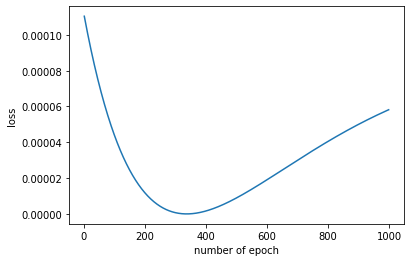

In [107]:


w,b=gradient_descent(x, y)


In [109]:
y_pred=predict_y(b, w, x )


In [110]:
df['y_pred']=y_pred

In [115]:
mean_squared_error(y, y_pred)

0.22623863901961405

#Error using scikit-learn SGD Regressor

In [116]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(alpha=0,learning_rate="constant",eta0=0.001)
model.fit(x,y)

SGDRegressor(alpha=0, eta0=0.001, learning_rate='constant')

In [117]:
y_pred_sgd=predict_y(model.intercept_, model.coef_, x )


In [118]:
mean_squared_error(y, y_pred_sgd)

0.01730863340574867